In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

import mne
from mne.viz import plot_topomap
from mne import Epochs, pick_types, find_events
from mne.channels import read_layout
from mne.io import concatenate_raws, read_raw_edf
from mne.decoding import CSP
import csv

from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, cross_val_score

from load_dataset import *

In [2]:
def load_raw_data(data_path):
    #load the raw data
    raw = mne.io.read_raw_fif(data_path, preload=True)
    return raw

In [3]:
def preprocess_eog(eog):
    eog.filter(1, 15, method="iir", iir_params=None)
    return eog

In [4]:
epochs, epochs_data, labels = load_dataset_epochs(window_size=0.1, test_size=0.2, random_state=0)

Start loading data...
From dataset: sub-CC221980
Opening raw data file /Users/mlion0200/GitRepo/eye_blink_detection/data/sub-CC221980/meg/passive_raw.fif...
    Read a total of 8 projection items:
        mag_ssp_upright.fif : PCA-mags-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-mags-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-mags-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-mags-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-mags-v5 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-grad-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-grad-v2 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-grad-v3 (1 x 306)  idle
    Range : 18000 ... 164999 =     18.000 ...   164.999 secs
Ready.
Current compensation grade : 0
Reading 0 ... 146999  =      0.000 ...   146.999 secs...
Filtering a subset of channels. The highpass and lowpass values in the measurement info will not be updated.
Setting up band-pass filter from 0.5 - 25 Hz
l_trans_bandwidth chosen t

/anaconda3/envs/mne/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


Created an SSP operator (subspace dimension = 3)
8 projection items activated
Loading data for 20 events and 101 original time points ...
0 bad epochs dropped
<Epochs  |   20 events (all good), -0.05 - 0.05 sec, baseline off, ~15.6 MB, data loaded,
 'negative': 10
 'positive': 10>
(20, 204, 101)
[1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]
Start loading data...
From dataset: sub-CC221775
Opening raw data file /Users/mlion0200/GitRepo/eye_blink_detection/data/sub-CC221775/meg/passive_raw.fif...
    Read a total of 8 projection items:
        mag_ssp_upright.fif : PCA-mags-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-mags-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-mags-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-mags-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-mags-v5 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-grad-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-grad-v2 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-grad-v3 (1 x 306)  id

Setting up band-pass filter from 1 - 15 Hz
41 events found
Event IDs: [1 2]
41 matching events found
No baseline correction applied
Not setting metadata
Created an SSP operator (subspace dimension = 3)
Loading data for 41 events and 101 original time points ...
0 bad epochs dropped
41 matching events found
No baseline correction applied
Not setting metadata
Created an SSP operator (subspace dimension = 3)
8 projection items activated
Loading data for 41 events and 101 original time points ...
0 bad epochs dropped
<Epochs  |   41 events (all good), -0.05 - 0.05 sec, baseline off, ~19.0 MB, data loaded,
 'negative': 21
 'positive': 20>
(41, 204, 101)
[2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2]
Start loading data...
From dataset: sub-CC310410
Opening raw data file /Users/mlion0200/GitRepo/eye_blink_detection/data/sub-CC310410/meg/passive_raw.fif...
    Read a total of 8 projection items:
        mag_ssp_upright.fif : PCA-mags-v1 (1 x 306)  idle
   

Setting up band-pass filter from 0.5 - 25 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 6.2 Hz
Filter length of 6601 samples (6.601 sec) selected
Setting up band-stop filter from 59 - 61 Hz
Filter length of 6601 samples (6.601 sec) selected
Creating RawArray with float64 data, n_channels=1, n_times=164000
    Range : 0 ... 163999 =      0.000 ...   163.999 secs
Ready.
Filtering a subset of channels. The highpass and lowpass values in the measurement info will not be updated.
Setting up band-pass filter from 1 - 15 Hz
15 events found
Event IDs: [1 2]
15 matching events found
No baseline correction applied
Not setting metadata
Created an SSP operator (subspace dimension = 3)
Loading data for 15 events and 101 original time points ...
0 bad epochs dropped
15 matching events found
No baseline correction applied
Not setting metadata
Created an SSP operator (subspace dimension = 3)
8 projection items activated
Loading data for 15 events and 101 original time points 

        mag_ssp_upright.fif : PCA-mags-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-mags-v5 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-grad-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-grad-v2 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-grad-v3 (1 x 306)  idle
    Range : 21000 ... 169999 =     21.000 ...   169.999 secs
Ready.
Current compensation grade : 0
Reading 0 ... 148999  =      0.000 ...   148.999 secs...
Filtering a subset of channels. The highpass and lowpass values in the measurement info will not be updated.
Setting up band-pass filter from 0.5 - 25 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 6.2 Hz
Filter length of 6601 samples (6.601 sec) selected
Setting up band-stop filter from 59 - 61 Hz
Filter length of 6601 samples (6.601 sec) selected
Creating RawArray with float64 data, n_channels=1, n_times=149000
    Range : 0 ... 148999 =      0.000 ...   148.999 secs
Ready.
Filtering a subset of channels. The highpass 

8 projection items activated
Loading data for 51 events and 101 original time points ...
0 bad epochs dropped
<Epochs  |   51 events (all good), -0.05 - 0.05 sec, baseline off, ~20.5 MB, data loaded,
 'negative': 26
 'positive': 25>
(51, 204, 101)
[2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2]
Start loading data...
From dataset: sub-CC310463
Opening raw data file /Users/mlion0200/GitRepo/eye_blink_detection/data/sub-CC310463/meg/passive_raw.fif...
    Read a total of 8 projection items:
        mag_ssp_upright.fif : PCA-mags-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-mags-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-mags-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-mags-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-mags-v5 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-grad-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-grad-v2 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-grad-v3

    Range : 0 ... 146999 =      0.000 ...   146.999 secs
Ready.
Filtering a subset of channels. The highpass and lowpass values in the measurement info will not be updated.
Setting up band-pass filter from 1 - 15 Hz
28 events found
Event IDs: [1 2]
28 matching events found
No baseline correction applied
Not setting metadata
Created an SSP operator (subspace dimension = 3)
Loading data for 28 events and 101 original time points ...
0 bad epochs dropped
28 matching events found
No baseline correction applied
Not setting metadata
Created an SSP operator (subspace dimension = 3)
8 projection items activated
Loading data for 28 events and 101 original time points ...
0 bad epochs dropped
<Epochs  |   28 events (all good), -0.05 - 0.05 sec, baseline off, ~16.9 MB, data loaded,
 'negative': 14
 'positive': 14>
(28, 204, 101)
[1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]
Start loading data...
From dataset: sub-CC312149
Opening raw data file /Users/mlion0200/GitRepo/eye_blink_detect

Setting up band-pass filter from 0.5 - 25 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 6.2 Hz
Filter length of 6601 samples (6.601 sec) selected
Setting up band-stop filter from 59 - 61 Hz
Filter length of 6601 samples (6.601 sec) selected
Creating RawArray with float64 data, n_channels=1, n_times=151000
    Range : 0 ... 150999 =      0.000 ...   150.999 secs
Ready.
Filtering a subset of channels. The highpass and lowpass values in the measurement info will not be updated.
Setting up band-pass filter from 1 - 15 Hz
3 events found
Event IDs: [1 2]
3 matching events found
No baseline correction applied
Not setting metadata
Created an SSP operator (subspace dimension = 3)
Loading data for 3 events and 101 original time points ...
0 bad epochs dropped
3 matching events found
No baseline correction applied
Not setting metadata
Created an SSP operator (subspace dimension = 3)
8 projection items activated
Loading data for 3 events and 101 original time points ...
0

    Range : 16000 ... 167999 =     16.000 ...   167.999 secs
Ready.
Current compensation grade : 0
Reading 0 ... 151999  =      0.000 ...   151.999 secs...
Filtering a subset of channels. The highpass and lowpass values in the measurement info will not be updated.
Setting up band-pass filter from 0.5 - 25 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 6.2 Hz
Filter length of 6601 samples (6.601 sec) selected
Setting up band-stop filter from 59 - 61 Hz
Filter length of 6601 samples (6.601 sec) selected
Creating RawArray with float64 data, n_channels=1, n_times=152000
    Range : 0 ... 151999 =      0.000 ...   151.999 secs
Ready.
Filtering a subset of channels. The highpass and lowpass values in the measurement info will not be updated.
Setting up band-pass filter from 1 - 15 Hz
9 events found
Event IDs: [1 2]
9 matching events found
No baseline correction applied
Not setting metadata
Created an SSP operator (subspace dimension = 3)
Loading data for 9 events and

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-55-81981517c859>:3: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked_ele.plot_topomap(times=[0, 0.025, 0.05, 0.075, 0.1], **plot_params)


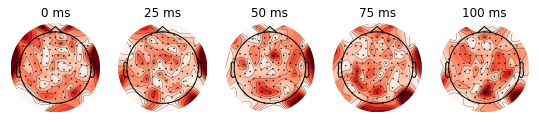

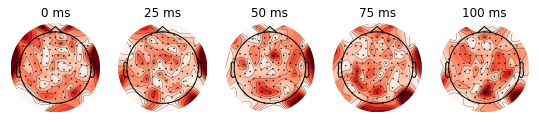

In [55]:
evoked_ele = mne.EvokedArray(epochs_data[10], epochs.info)
plot_params = dict(ch_type='grad', outlines='skirt', colorbar=False)
evoked_ele.plot_topomap(times=[0, 0.025, 0.05, 0.075, 0.1], **plot_params)

In [5]:
train_x_orig, test_x_orig, train_y_orig, test_y_orig = train_test_split(epochs_data, labels, test_size=0.2, random_state=0)

In [36]:
epochs_array = np.asarray(epochs)
epochs_data_array = np.asarray(epochs_data)
labels_array = np.asarray(labels)

print ("epochs_array shape: " + str(epochs_array.shape))
print ("epochs_data_array shape: " + str(epochs_data_array.shape))
print ("labels_array shape: " + str(labels_array.shape))

epochs_array shape: (9, 204, 101)
epochs_data_array shape: (1097, 204, 101)
labels_array shape: (1097,)


In [7]:
train_x_array = np.asarray(train_x_orig)
test_x_array = np.asarray(test_x_orig)
train_y_array = np.asarray(train_y_orig)
test_y_array = np.asarray(test_y_orig)
m_train = train_x_array.shape[0]
num_px = train_x_array.shape[1]
m_test = test_x_array.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("train_x_orig shape: " + str(train_x_array.shape))
print ("train_y shape: " + str(train_y_array.shape))
print ("test_x_orig shape: " + str(test_x_array.shape))
print ("test_y shape: " + str(test_y_array.shape))

Number of training examples: 877
Number of testing examples: 220
train_x_orig shape: (877, 204, 101)
train_y shape: (877,)
test_x_orig shape: (220, 204, 101)
test_y shape: (220,)


In [8]:
meg_data = train_x_array.reshape(len(train_y_array), -1)

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from mne.decoding import LinearModel

In [10]:
clf = LogisticRegression(solver='lbfgs', max_iter=2000)
scaler = StandardScaler()

# create a linear model with LogisticRegression
model = LinearModel(clf)

# fit the classifier on MEG data
X = scaler.fit_transform(meg_data)
model.fit(X, train_y_array)

LinearModel(model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=2000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False))

In [11]:
from mne import io, EvokedArray
from mne.datasets import sample
from mne.decoding import Vectorizer, get_coef

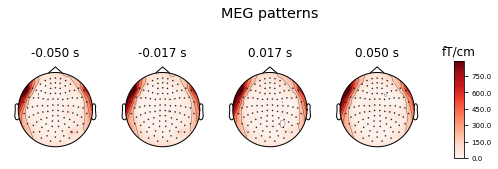

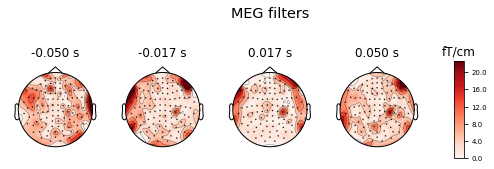

In [12]:
# Extract and plot spatial filters and spatial patterns
for name, coef in (('patterns', model.patterns_), ('filters', model.filters_)):
    # We fitted the linear model onto Z-scored data. To make the filters
    # interpretable, we must reverse this normalization step
    coef = scaler.inverse_transform([coef])[0]

    # The data was vectorized to fit a single model across all time points and
    # all channels. We thus reshape it:
    coef = coef.reshape(len(epochs.ch_names), -1)

    # Plot
    evoked = EvokedArray(coef, epochs.info, tmin=-0.05)
    evoked.plot_topomap(title='MEG %s' % name, time_unit='s')

In [13]:
meg_test_data = test_x_array.reshape(len(test_y_array), -1)

In [14]:
model.predict(meg_test_data)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

import mne
from mne.datasets import sample
from mne.decoding import (SlidingEstimator, GeneralizingEstimator, Scaler,
                          cross_val_multiscore, LinearModel, get_coef,
                          Vectorizer, CSP)

In [21]:
csp = CSP(n_components=1, norm_trace=False)
clf = make_pipeline(csp, LogisticRegression(solver='lbfgs', max_iter=2000))
scores = cross_val_multiscore(clf, train_x_array, train_y_array, cv=5, n_jobs=1)
print('CSP: %0.1f%%' % (100 * scores.mean(),))

Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
CSP: 52.0%


In [22]:
clf = make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs', max_iter=2000))

time_decod = SlidingEstimator(clf, n_jobs=1, scoring='roc_auc')
scores = cross_val_multiscore(time_decod, train_x_array, train_y_array, cv=5, n_jobs=1)

Text(0.5, 1.0, 'Sensor space decoding')

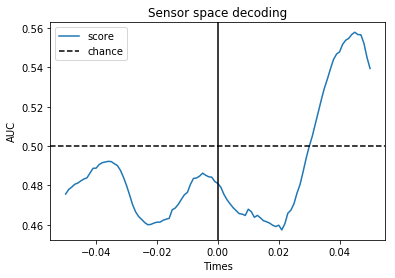

In [23]:
# Mean scores across cross-validation splits
scores = np.mean(scores, axis=0)

# Plot
fig, ax = plt.subplots()
ax.plot(epochs.times, scores, label='score')
ax.axhline(.5, color='k', linestyle='--', label='chance')
ax.set_xlabel('Times')
ax.set_ylabel('AUC')  # Area Under the Curve
ax.legend()
ax.axvline(.0, color='k', linestyle='-')
ax.set_title('Sensor space decoding')

In [24]:
clf = make_pipeline(StandardScaler(),
                    LinearModel(LogisticRegression(solver='lbfgs', max_iter=2000)))
time_decod = SlidingEstimator(clf, n_jobs=1, scoring='roc_auc')
time_decod.fit(train_x_array, train_y_array)

<SlidingEstimator(base_estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linearmodel', LinearModel(model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=2000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)))]),
         n_jobs=1, scoring='roc_auc', fitted with 101 estimators>

In [25]:
coef = get_coef(time_decod, 'patterns_', inverse_transform=True)
evoked = mne.EvokedArray(coef, epochs.info, tmin=epochs.times[0])
joint_kwargs = dict(ts_args=dict(time_unit='s'),
                    topomap_args=dict(time_unit='s'))

In [26]:
plt.rcParams["figure.figsize"] = (12, 9) # (w, h)

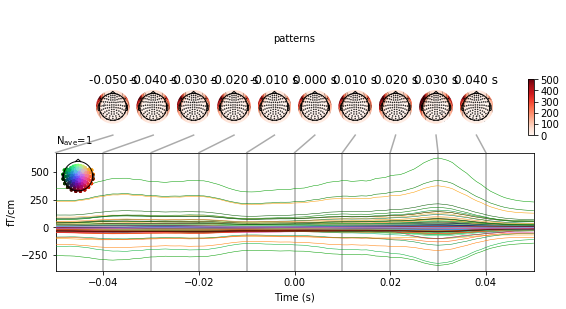

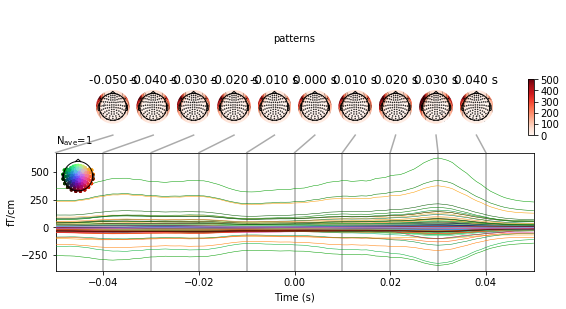

In [27]:
evoked.plot_joint(times=np.arange(-0.05, 0.050, 0.0100), title='patterns',
                  **joint_kwargs)

In [21]:
np.set_printoptions(threshold=np.nan)

In [28]:
time_decod.score(test_x_array, test_y_array)

array([0.45951534, 0.4616657 , 0.45736498, 0.45389132, 0.45265073,
       0.45372591, 0.45347779, 0.45256803, 0.45273344, 0.45777851,
       0.45918452, 0.46075593, 0.46050782, 0.46108676, 0.45968075,
       0.45719957, 0.45587627, 0.45380862, 0.45050037, 0.45256803,
       0.45405674, 0.4548838 , 0.45471839, 0.45662063, 0.45786122,
       0.45926722, 0.45926722, 0.4562071 , 0.45364321, 0.45058308,
       0.45025225, 0.44835001, 0.44835001, 0.4521545 , 0.45868828,
       0.46232735, 0.46728972, 0.47192126, 0.4791167 , 0.4791994 ,
       0.47787611, 0.48019188, 0.48242494, 0.48573319, 0.48366554,
       0.4845753 , 0.48598131, 0.48027458, 0.48110165, 0.48060541,
       0.47713175, 0.47423704, 0.47134232, 0.46447771, 0.4603424 ,
       0.45571086, 0.45405674, 0.45554545, 0.4562898 , 0.45802663,
       0.45951534, 0.46001158, 0.46513936, 0.46770325, 0.46762054,
       0.47291374, 0.47200397, 0.47200397, 0.47043255, 0.46555289,
       0.45637251, 0.44851542, 0.445538  , 0.44032752, 0.43867

In [29]:
test_y_array

array([2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1,
       2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1,
       2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1])

In [30]:
time_decod.predict(test_x_array)

array([[2, 2, 2, ..., 2, 2, 1],
       [1, 2, 2, ..., 2, 2, 2],
       [1, 1, 2, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 1, 1, ..., 2, 2, 2],
       [2, 2, 2, ..., 1, 1, 1]])